# Programming Exercise 6: Support Vector Machines

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.optimize #fmin_cg to train the linear regression
from sklearn import svm #SVM software

## 1 Support Vector Machines

## 1.1 Example Dataset 1

In [2]:
datafile = 'data/ex6data1.mat'
mat = scipy.io.loadmat(datafile)

X, y = mat['X'], mat['y']
#NOT inserting a column of 1's in case SVM software does it for me automatically...

pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

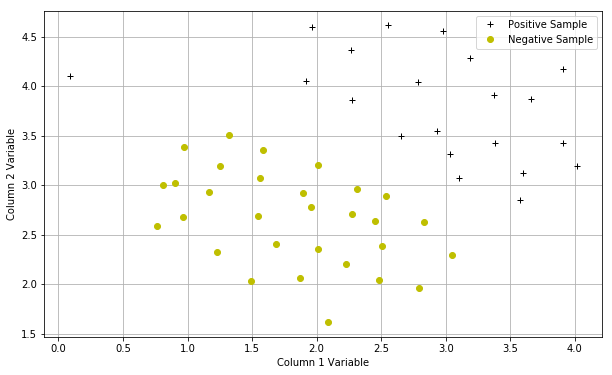

In [3]:
def plotData():
    plt.figure(figsize=(10, 6))
    plt.plot(pos[:, 0], pos[:, 1], 'k+', label='Positive Sample')
    plt.plot(neg[:, 0], neg[:, 1], 'yo', label='Negative Sample')
    plt.xlabel('Column 1 Variable')
    plt.ylabel('Column 2 Variable')
    plt.legend()
    plt.grid(True)
    
plotData()

In [4]:
def plotBoundary(my_svm, xmin, xmax, ymin, ymax):
    xvals = np.linspace(xmin, xmax, 500)
    yvals = np.linspace(ymin, ymax, 500)
    zvals = np.zeros([len(xvals), len(yvals)])
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            zvals[i][j] = float(my_svm.predict([[xvals[i], yvals[j]]]))
    zvals = zvals.transpose()

    u, v = np.meshgrid(xvals, yvals)
    mycontour = plt.contour(xvals, yvals, zvals, [0])

/Users/mvpzhao/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0.5,1,'SVM Decision Boundary with C = 1 (Example Dataset 1)')

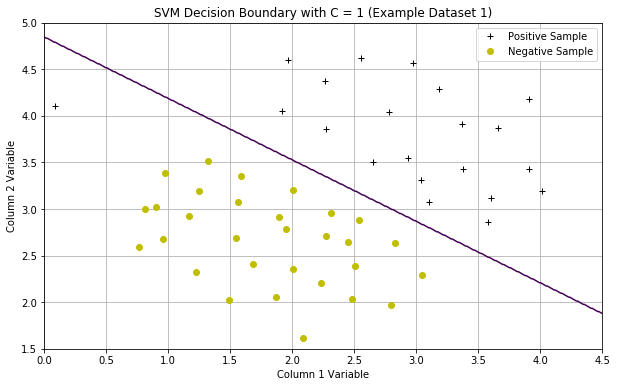

In [5]:
linear_svm = svm.SVC(C=1, kernel='linear')
linear_svm.fit(X, y.flatten())

plotData()
plotBoundary(linear_svm, 0, 4.5, 1.5, 5)
plt.title('SVM Decision Boundary with C = 1 (Example Dataset 1)')

/Users/mvpzhao/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0.5,1,'SVM Decision Boundary with C = 100 (Example Dataset 1)')

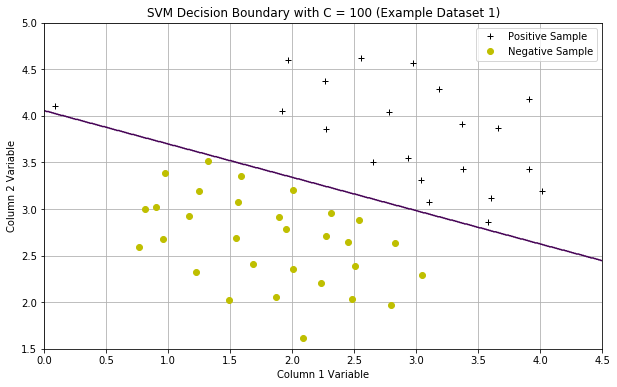

In [6]:
linear_svm = svm.SVC(C=100, kernel='linear')
linear_svm.fit(X, y.flatten())

plotData()
plotBoundary(linear_svm, 0, 4.5, 1.5, 5)
plt.title('SVM Decision Boundary with C = 100 (Example Dataset 1)')

## 1.2 SVM with Gaussian Kernels

## 1.2.1 Gaussian Kernel

In [7]:
# Here's how to use this SVM software with a custom kernel:
# http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html
def gaussKernel(x1, x2, sigma):
    x1_2 = x1-x2
    sigmaSquared = np.power(sigma, 2)
    return np.exp(-x1_2.T.dot(x1_2)/(2*sigmaSquared))

print(gaussKernel(np.array([1, 2, 1]), np.array([1, 2, 1.1]), 2.))

0.998750780925


## 1.2.2 Example Dataset 2

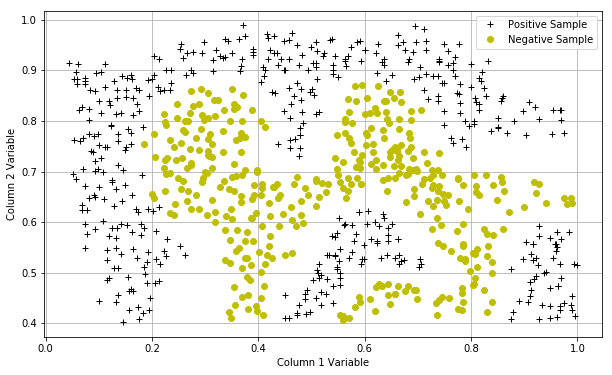

In [8]:
datafile = 'data/ex6data2.mat'
mat = scipy.io.loadmat(datafile)

X, y = mat['X'], mat['y']

pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

plotData()

/Users/mvpzhao/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0.5,1,'SVM (Gaussian Kernel) Decision Boundary (Example Dataset 2)')

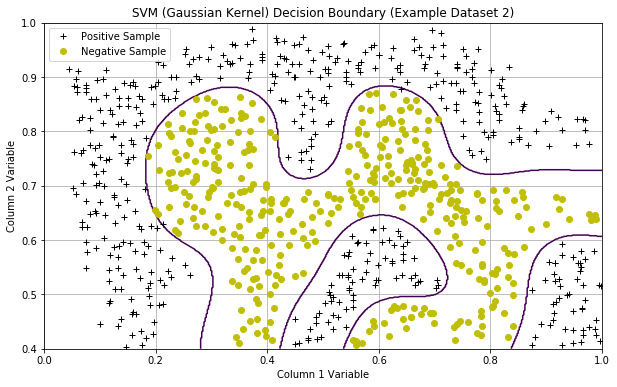

In [9]:
sigma = 0.1
gamma = np.power(sigma, -2.)
gaus_svm = svm.SVC(C=1, kernel='rbf', gamma=gamma)
gaus_svm.fit(X, y.flatten())

plotData()
plotBoundary(gaus_svm, 0, 1, .4, 1.0)
plt.title('SVM (Gaussian Kernel) Decision Boundary (Example Dataset 2)')

## 1.2.3 Example Dataset 3

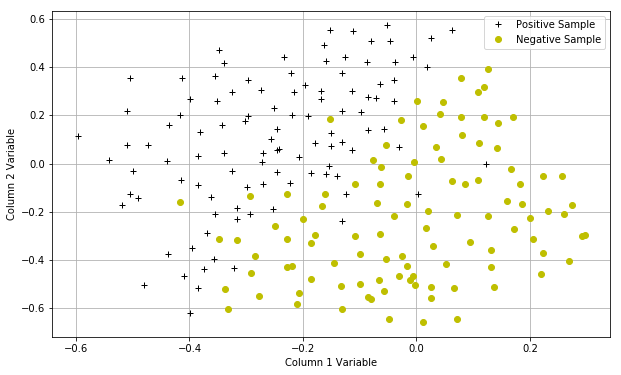

In [10]:
datafile = 'data/ex6data3.mat'
mat = scipy.io.loadmat(datafile)

X, y = mat['X'], mat['y']
Xval, yval = mat['Xval'], mat['yval']

pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

plotData()

In [11]:
Cvalues = (0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.)
sigmavalues = Cvalues
best_pair, best_score = (0, 0), 0

for Cvalue in Cvalues:
    for sigmavalue in sigmavalues:
        gamma = np.power(sigmavalue, -2.)
        gaus_svm = svm.SVC(C=Cvalue, kernel='rbf', gamma=gamma)
        gaus_svm.fit(X, y.flatten())
        this_score = gaus_svm.score(Xval, yval)
        if this_score > best_score:
            best_score = this_score
            best_pair = (Cvalue, sigmavalue)
            
print("Best C, sigma pair is (%f, %f) with a score of %f." % (best_pair[0], best_pair[1], best_score))

Best C, sigma pair is (0.300000, 0.100000) with a score of 0.965000.


/Users/mvpzhao/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0.5,1,'SVM (Gaussian Kernel) Decision Boundary (Example Dataset 3)')

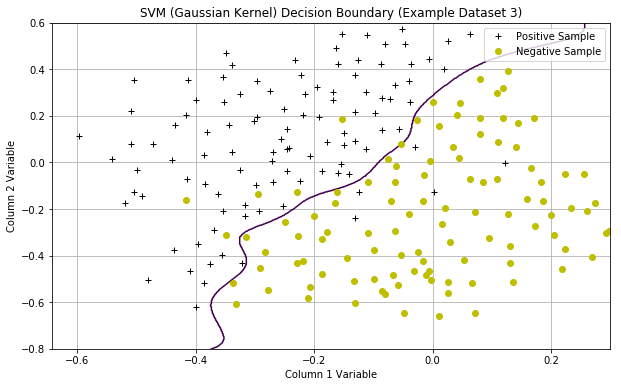

In [12]:
gaus_svm = svm.SVC(C=best_pair[0], kernel='rbf', gamma = np.power(best_pair[1], -2.))
gaus_svm.fit(X, y.flatten())

plotData()
plotBoundary(gaus_svm, -.4, .3, -.8, .6)
plt.title('SVM (Gaussian Kernel) Decision Boundary (Example Dataset 3)')

## 2 Spam Classification

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
from sklearn import svm #SVM software
import re #regular expression for e-mail processing

# This is one possible porter stemmer 
# (note: I had to do a pip install stemming)
# https://pypi.python.org/pypi/stemming/1.0
from stemming.porter2 import stem

# This porter stemmer seems to more accurately duplicate the
# porter stemmer used in the OCTAVE assignment code
# (note: I had to do a pip install nltk)
# I'll note that both stemmers have very similar results
import nltk, nltk.stem.porter

## 2.1 Preprocessing Emails

In [14]:
print("emailSample1.txt:")
!cat data/emailSample1.txt

emailSample1.txt:
> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com



In [15]:
def preProcess(email):
    """
    Function to do some pre processing (simplification of e-mails).
    Comments throughout implementation describe what it does.
    Input = raw e-mail
    Output = processed (simplified) email
    """
    # Make the entire e-mail lower case
    email = email.lower()
    
    # Strip html tags (strings that look like <blah> where 'blah' does not
    # contain '<' or '>')... replace with a space
    email = re.sub('<[^<>]+>', ' ', email);
    
    #Any numbers get replaced with the string 'number'
    email = re.sub('[0-9]+', 'number', email)
    
    #Anything starting with http or https:// replaced with 'httpaddr'
    email = re.sub('(http|https)://[^\s]*', 'httpaddr', email)
    
    #Strings with "@" in the middle are considered emails --> 'emailaddr'
    email = re.sub('[^\s]+@[^\s]+', 'emailaddr', email);
    
    #The '$' sign gets replaced with 'dollar'
    email = re.sub('[$]+', 'dollar', email);
    
    return email

preProcess(open('data/emailSample1.txt', 'r').read())

"> anyone knows how much it costs to host a web portal ?\n>\nwell, it depends on how many visitors you're expecting.\nthis can be anywhere from less than number bucks a month to a couple of dollarnumber. \nyou should checkout httpaddr or perhaps amazon ecnumber \nif youre running something big..\n\nto unsubscribe yourself from this mailing list, send an email to:\nemailaddr\n\n"

In [16]:
def email2TokenList(raw_email):
    """
    Function that takes in preprocessed (simplified) email, tokenizes it,
    stems each word, and returns an (ordered) list of tokens in the e-mail
    """
    
    # I'll use the NLTK stemmer because it more accurately duplicates the
    # performance of the OCTAVE implementation in the assignment
    stemmer = nltk.stem.porter.PorterStemmer()
    
    email = preProcess(raw_email)

    #Split the e-mail into individual words (tokens) (split by the delimiter ' ')
    #but also split by delimiters '@', '$', '/', etc etc
    #Splitting by many delimiters is easiest with re.split()
    tokens = re.split('[ \@\$\/\#\.\-\:\&\*\+\=\[\]\?\!\(\)\{\}\,\'\"\>\_\<\;\%]', email)
    
    #Loop over each word (token) and use a stemmer to shorten it,
    #then check if the word is in the vocab_list... if it is,
    #store what index in the vocab_list the word is
    tokenlist = []
    for token in tokens:

        #Remove any non alphanumeric characters
        token = re.sub('[^a-zA-Z0-9]', '', token);

        #Use the Porter stemmer to stem the word
        stemmed = stemmer.stem(token)

        #Throw out empty tokens
        if not len(token): continue

        #Store a list of all unique stemmed words
        tokenlist.append(stemmed)

    return tokenlist

## 2.1.1 Vocabulary List

In [17]:
def getVocabDict(reverse=False):
    """
    Function to read in the supplied vocab list text file into a dictionary.
    I'll use this for now, but since I'm using a slightly different stemmer,
    I'd like to generate this list myself from some sort of data set...
    Dictionary key is the stemmed word, value is the index in the text file
    If "reverse", the keys and values are switched.
    """
    vocab_dict = {}
    with open("data/vocab.txt") as f:
        for line in f:
            (val, key) = line.split()
            if not reverse:
                vocab_dict[key] = int(val)
            else:
                vocab_dict[int(val)] = key
                
    return vocab_dict

In [18]:
def email2VocabIndices(raw_email, vocab_dict):
    """
    Function that takes in a raw email and returns a list of indices corresponding
    to the location in vocab_dict for each stemmed word in the email.
    """
    tokenlist = email2TokenList(raw_email)
    index_list = [vocab_dict[token] for token in tokenlist if token in vocab_dict]
    return index_list

## 2.2 Extracting Features from Emails

In [19]:
def email2FeatureVector(raw_email, vocab_dict):
    """
    Function that takes as input a raw email, and returns a vector of shape
    (n,1) where n is the size of the vocab_dict.
    The first element in this vector is 1 if the vocab word with index == 1
    is in the raw_email, 0 otherwise.
    """
    n = len(vocab_dict)
    result = np.zeros((n,1))
    vocab_indices = email2VocabIndices(email_contents, vocab_dict)
    for idx in vocab_indices:
        result[idx] = 1
    return result

In [20]:
# " ... run your code on the email sample. You should see that the feature vector 
# has length 1899 and 45 non-zero entries."

vocab_dict = getVocabDict()
email_contents = open('data/emailSample1.txt', 'r').read()
test_fv = email2FeatureVector(email_contents, vocab_dict)

print("Length of feature vector is %d" % len(test_fv))
print("Number of non-zero entries is: %d" % sum(test_fv==1))

Length of feature vector is 1899
Number of non-zero entries is: 45


## 2.3 Training SVM for Spam Classification

In [21]:
# Read in the training set and test set provided
# Note the feature vectors correspond to the stemming implementation
# done in the OCTAVE code... which may be different than mine.

# Training set
datafile = 'data/spamTrain.mat'
mat = scipy.io.loadmat(datafile)
X, y = mat['X'], mat['y']
#NOT inserting a column of 1's in case SVM software does it for me automatically...
#X =     np.insert(X    ,0,1,axis=1)

# Test set
datafile = 'data/spamTest.mat'
mat = scipy.io.loadmat(datafile)
X_test, y_test = mat['Xtest'], mat['ytest']

In [22]:
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
print('Total number of training emails = ', X.shape[0])
print('Number of training spam emails = ', pos.shape[0])
print('Number of training nonspam emails = ', neg.shape[0])

Total number of training emails =  4000
Number of training spam emails =  1277
Number of training nonspam emails =  2723


In [23]:
# Run the SVM training (with C = 0.1) using SVM software. 

# First we make an instance of an SVM with C=0.1 and 'linear' kernel
linear_svm = svm.SVC(C=0.1, kernel='linear')

# Now we fit the SVM to our X matrix, given the labels y
linear_svm.fit(X, y.flatten())

# "Once the training completes, you should see that the classifier gets a 
# training accuracy of about 99.8% and a test accuracy of about 98.5%"

train_predictions = linear_svm.predict(X).reshape([y.shape[0], 1])
train_acc = 100. * float(sum(train_predictions == y)) / y.shape[0]
print('Training accuracy = %0.2f%%' % train_acc)

test_predictions = linear_svm.predict(X_test).reshape([y_test.shape[0], 1])
test_acc = 100. * float(sum(test_predictions == y_test)) / y_test.shape[0]
print('Test set accuracy = %0.2f%%' % test_acc)

Training accuracy = 99.83%
Test set accuracy = 98.90%


## 2.4 Top Predictors for Spam

In [24]:
# Determine the words most likely to indicate an e-mail is a spam
# From the trained SVM we can get a list of the weight coefficients for each
# word (technically, each word index)

vocab_dict_flipped = getVocabDict(reverse=True)

# Sort indicies from most important to least-important (high to low weight)
sorted_indices = np.argsort(linear_svm.coef_, axis=None)[::-1]
print("The 15 most important words to classify a spam e-mail are:")
print([ vocab_dict_flipped[x] for x in sorted_indices[:15] ])
print()
print("The 15 least important words to classify a spam e-mail are:")
print([ vocab_dict_flipped[x] for x in sorted_indices[-15:] ])
print()

# Most common word (mostly to debug):
most_common_word = vocab_dict_flipped[sorted_indices[0]]
print('# of spam containing \"%s\" = %d/%d = %0.2f%%'% \
    (most_common_word, sum(pos[:,1190]),pos.shape[0],  \
     100.*float(sum(pos[:,1190]))/pos.shape[0]))
print('# of NON spam containing \"%s\" = %d/%d = %0.2f%%'% \
    (most_common_word, sum(neg[:,1190]),neg.shape[0],      \
     100.*float(sum(neg[:,1190]))/neg.shape[0]))

The 15 most important words to classify a spam e-mail are:
['otherwis', 'clearli', 'remot', 'gt', 'visa', 'base', 'doesn', 'wife', 'previous', 'player', 'mortgag', 'natur', 'll', 'futur', 'hot']

The 15 least important words to classify a spam e-mail are:
['http', 'toll', 'xp', 'ratio', 'august', 'unsubscrib', 'useless', 'numberth', 'round', 'linux', 'datapow', 'wrong', 'urgent', 'that', 'spam']

# of spam containing "otherwis" = 804/1277 = 62.96%
# of NON spam containing "otherwis" = 301/2723 = 11.05%
